# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [45]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import drive
import os
import time

In [10]:
# Mount drive in order to access dataset
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/MNA/Advanced Machine Learning/CNN-Pytorch"
os.chdir(dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Download Cifar10 dataset

In [4]:
# Verify if GPU resources are available
torch.cuda.is_available()

False

In [11]:
DATA_PATH = '/CIFAR10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:01<00:00, 95843229.25it/s] 


Extracting /CIFAR10/cifar-10-python.tar.gz to /CIFAR10
Files already downloaded and verified
Files already downloaded and verified


In [12]:
# Show train specs
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [13]:
# Verify batch size
train_loader.batch_size

64

In [14]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
          [ 1.5551e-01, -8.4472e-01, -7.1771e-01,  ..., -1.1464e+00,
           -1.6862e+00, -1.3845e+00],
          [-4.7956e-01, -5.2719e-01,  1.7139e-01,  ..., -1.1464e+00,
           -1.7338e+00, -1.3845e+00],
          ...,
          [ 1.9178e+00,  1.4257e+00,  5.2068e-01,  ...,  2.0449e+00,
            2.0607e+00,  1.8702e+00],
          [ 2.0131e+00,  1.9337e+00,  1.8226e+00,  ...,  2.0290e+00,
            2.0607e+00,  1.9020e+00],
          [ 1.7591e+00,  1.6797e+00,  1.6638e+00,  ...,  1.6956e+00,
            1.7114e+00,  1.6162e+00]],

         [[ 2.9194e-01, -5.1497e-01, -2.7290e-01,  ..., -1.5993e-01,
           -3.3745e-01, -7.0863e-01],
          [ 3.2422e-01, -6.7635e-01, -6.4407e-01,  ..., -1.0798e+00,
           -1.5478e+00, -1.3703e+00],
          [-2.2448e-01, -3.3745e-01,  2.4352e-01,  ..., -1.0959e+00,
           -1.6608e+00, -1.4026e+00],
          ...,
          [ 2.0349e+00,  1.5346e+00,  6.3084e

### Using  GPUs

In [15]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: frog


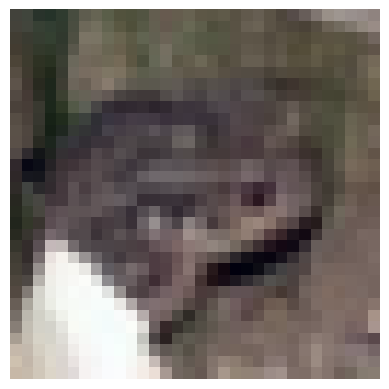

In [20]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


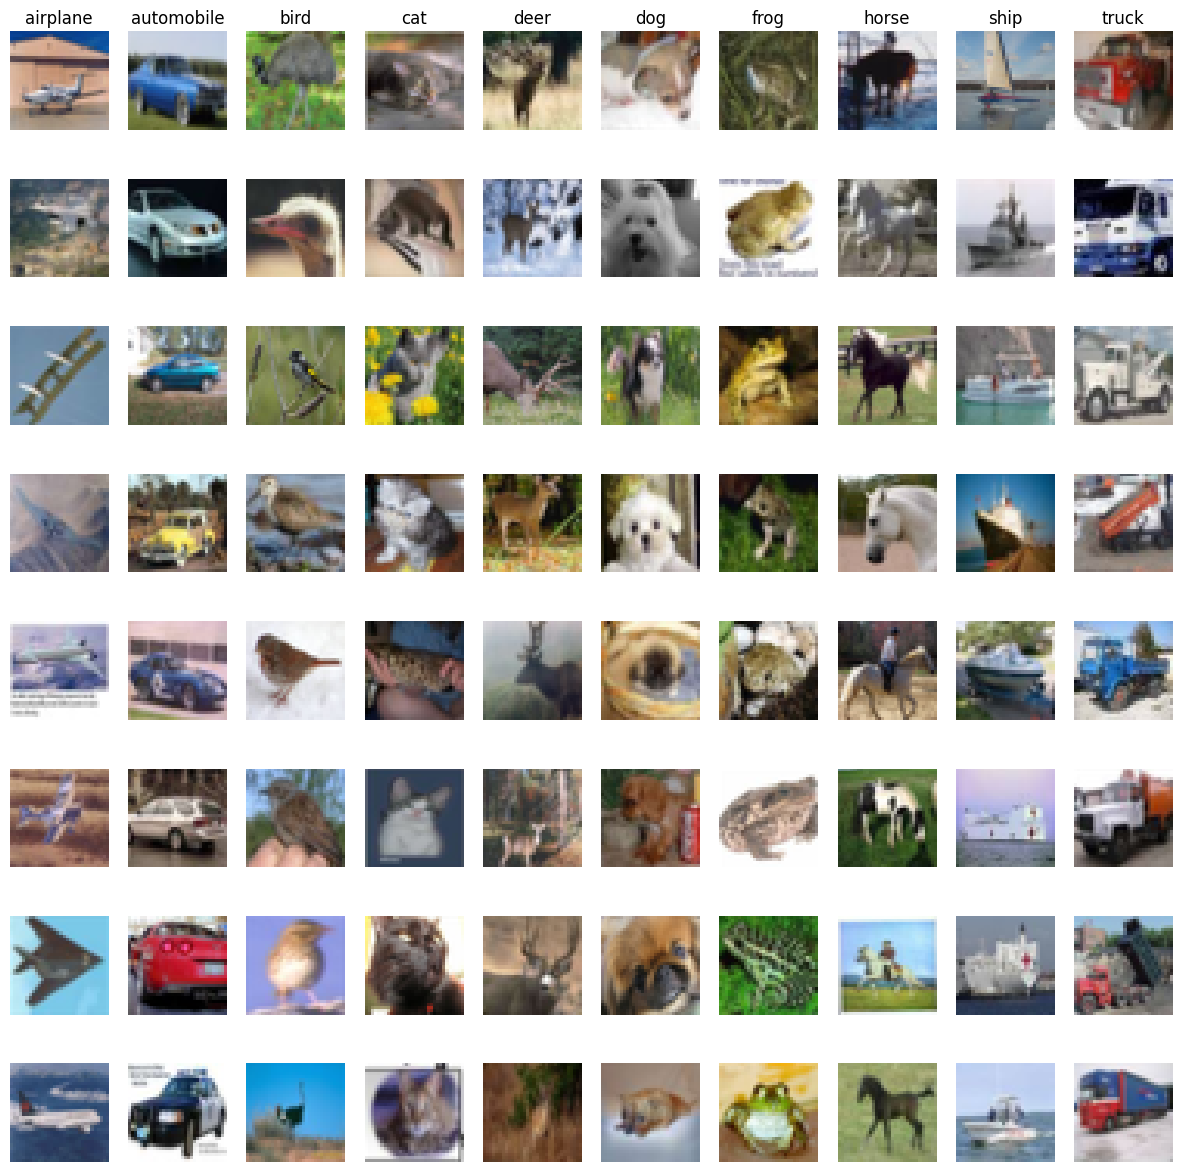

In [24]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [25]:
def accuracy(model, loader):
  correct = 0
  total = 0

  # Model in evaluation mode
  model.eval()

  # Move model to device selected
  model = model.to(device=device)

  with torch.no_grad():
    for xi, yi in loader:
      xi = xi.to(device=device)
      yi = yi.to(device=device)
      scores = model(xi)
      _, predictions = scores.max(dim=1)
      correct += (predictions == yi).sum()
      total += predictions.size(0)

    return float(correct)/total

### Loop de entrenamiento

In [26]:
def train(model, optimiser, epochs=100):

    # Move model to device selected
    model = model.to(device=device)

    # Perform training loop
    for epoch in range(epochs):
      for i, (xi, yi) in enumerate(train_loader):
        # Move data to device selected
        xi = xi.to(device=device)
        yi = yi.to(device=device)
        model.train()
        scores = model(xi)                    # Feedforward
        cost = F.cross_entropy(scores, yi)    # Compute Cross Entropy Loss
        optimiser.zero_grad()                 # Grad 0
        cost.backward()                       # Backpropagation
        optimiser.step()                      # Parameter update

      # Get accuracy of current epoch
      acc = accuracy(model, val_loader)
      print(f'Epoch: {epoch}, Loss, {cost.item()}, Accuracy: {acc}')


### Linear model

In [33]:
hid_lay1 = 512
hid_lay2 = 512
lr = 0.001
epochs = 10
image_size = 32*32*3

# Define Fully Connected Architecture

model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=image_size, out_features=hid_lay1),
    nn.ReLU(),
    nn.Linear(in_features=hid_lay1, out_features=hid_lay2),
    nn.ReLU(),
    nn.Linear(in_features=hid_lay2, out_features=10)
)

In [34]:
# Define FC optimizer
optimiser = torch.optim.Adam(params=model1.parameters(), lr=lr)

In [35]:
train(model1, optimiser, epochs)

Epoch: 0, Loss, 1.7302883863449097, Accuracy: 0.4648
Epoch: 1, Loss, 1.8753892183303833, Accuracy: 0.5118
Epoch: 2, Loss, 1.7275887727737427, Accuracy: 0.5106
Epoch: 3, Loss, 1.156545639038086, Accuracy: 0.5294
Epoch: 4, Loss, 1.023529291152954, Accuracy: 0.519
Epoch: 5, Loss, 1.0067998170852661, Accuracy: 0.5288
Epoch: 6, Loss, 1.0764315128326416, Accuracy: 0.5248
Epoch: 7, Loss, 0.9994207620620728, Accuracy: 0.5126
Epoch: 8, Loss, 1.3639215230941772, Accuracy: 0.516
Epoch: 9, Loss, 0.587447464466095, Accuracy: 0.5156


In [36]:
accuracy(model1, test_loader)

0.5134

### Sequential CNN

In [37]:
# Define function to create a convolutional layer
conv_k3 = lambda in_channels, out_channels: nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)

In [38]:
class CNNArchitecture(nn.Module):
  def __init__(self, in_channel, chan_filters1, chan_filters2):
    super().__init__()
    # Define convolutional layers
    self.conv1 = conv_k3(in_channels=in_channel, out_channels=chan_filters1)
    self.bn1 = nn.BatchNorm2d(chan_filters1)
    self.conv2 = conv_k3(in_channels=chan_filters1, out_channels=chan_filters2)
    self.bn2 = nn.BatchNorm2d(chan_filters2)

    # Define other layers of the ne
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.flatten = nn.Flatten()
    self.fc = nn.Linear(in_features=chan_filters2*16*16, out_features=10)

  def forward(self, x):
    # Apply feedforward to the network
    x = F.relu(self.bn1(self.conv1(x)))
    x = F.relu(self.bn2(self.conv2(x)))
    x = self.maxpool(x)
    x = self.flatten(x)

    return self.fc(x)

In [54]:
chan_filters1 = 16
chan_filters2 = 32
lr = 0.0001
in_channel = 3
epochs = 15

# Define CNN Architecture
modelCNN1 = CNNArchitecture(in_channel, chan_filters1, chan_filters2)

In [55]:
# Define CNN optimizer
optimiser = torch.optim.Adam(params=modelCNN1.parameters(), lr=lr)

In [56]:
init_time = time.time()

In [57]:
# Training loop
train(modelCNN1, optimiser, epochs)
fin_time = time.time()

Epoch: 0, Loss, 1.2771358489990234, Accuracy: 0.5612
Epoch: 1, Loss, 1.1114814281463623, Accuracy: 0.6124
Epoch: 2, Loss, 0.8349470496177673, Accuracy: 0.633
Epoch: 3, Loss, 1.2024670839309692, Accuracy: 0.645
Epoch: 4, Loss, 0.7693859338760376, Accuracy: 0.6512
Epoch: 5, Loss, 0.6566740274429321, Accuracy: 0.6642
Epoch: 6, Loss, 1.1272971630096436, Accuracy: 0.6544
Epoch: 7, Loss, 0.863595187664032, Accuracy: 0.6708
Epoch: 8, Loss, 0.8852581977844238, Accuracy: 0.6664
Epoch: 9, Loss, 0.6700212359428406, Accuracy: 0.6698
Epoch: 10, Loss, 0.8392792344093323, Accuracy: 0.6754
Epoch: 11, Loss, 0.7762328386306763, Accuracy: 0.6694
Epoch: 12, Loss, 0.516440749168396, Accuracy: 0.6636
Epoch: 13, Loss, 0.5287513732910156, Accuracy: 0.6738
Epoch: 14, Loss, 0.6459969282150269, Accuracy: 0.6658


In [59]:
# Compute training time
print(f'Training time: {(fin_time - init_time)/60} min')

Training time: 24.537883007526396 min


In [58]:
accuracy(modelCNN1, test_loader)

0.6672